# Task Generate Motor Correction plots and Timing txt files

This notebook is used to explore the data and it' run on the local (mac) jupyter notebook

##### !! WARNING: make sure to mount the data volume and the folder locally!!

In [11]:
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Motor correction

This section is used to check how much the subject move per session

In [2]:
# correct the path locally 
local_path = '/Volumes/Data3/Ilaria/Meditation/'
subject = 'Pilot01_AF'
moco_paths = 'func/zoom*/Moco/moco_params.tsv'
ex_moco_paths = 'func/excl_zoom*/Moco/moco_params.tsv'

list_moco_files = glob(os.path.join(local_path, subject, moco_paths))
list_excluded_files = glob(os.path.join(local_path, subject, ex_moco_paths))

In [3]:
sorted(list_moco_files)

['/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_1/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_10/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_2/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_3/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_4/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_5/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_6/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_7/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_8/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_9/Moco/moco_params.tsv']

In [4]:
list_moco_files = sorted(list_moco_files)
list_moco_files_s = []
list_moco_files_s.append(list_moco_files[0])
list_moco_files_s.extend(list_moco_files[2:])
list_moco_files_s.append(list_moco_files[1])
# list_moco_files_s.append(list_moco_files[1])

In [5]:
list_moco_files_s

['/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_1/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_2/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_3/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_4/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_5/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_6/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_7/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_8/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_9/Moco/moco_params.tsv',
 '/Volumes/Data3/Ilaria/Meditation/Pilot01_AF/func/zoom_TR2.5_10/Moco/moco_params.tsv']

In [6]:
def plot_moco_xy(moco_params_df, i):
    
    fig = plt.figure(figsize=(5,7))

    plt.plot(moco_params_df.X, 'red' )
    plt.plot(moco_params_df.Y, 'blue')
    plt.ylim([-1.5,1.5])
    plt.ylabel("mm")
    plt.xlabel("image")
    plt.title("Displacement")
    plt.legend(['x','y'])
    plt.show()
    
    fig.suptitle("Ses-%s" %str(i+1))
    


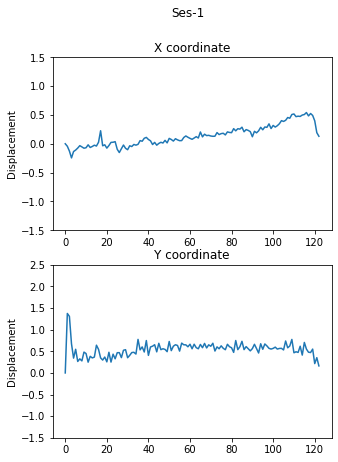

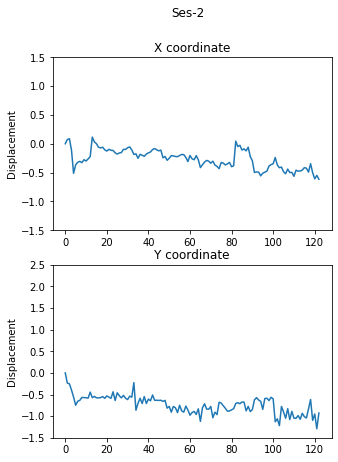

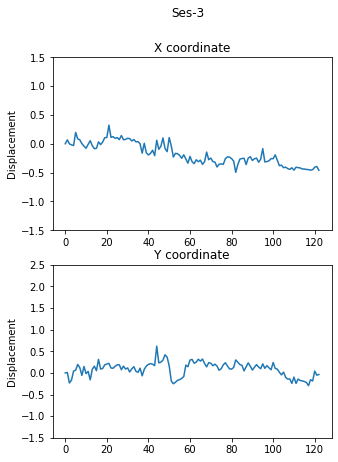

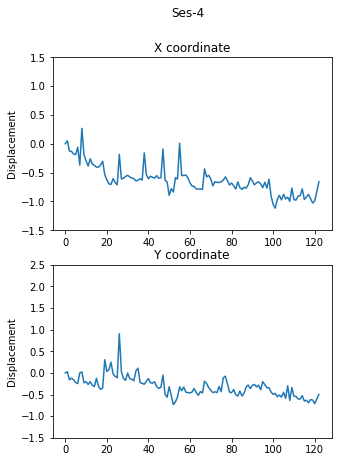

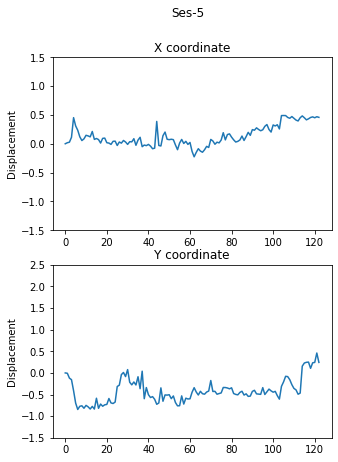

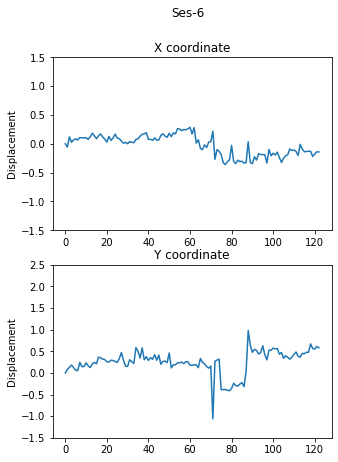

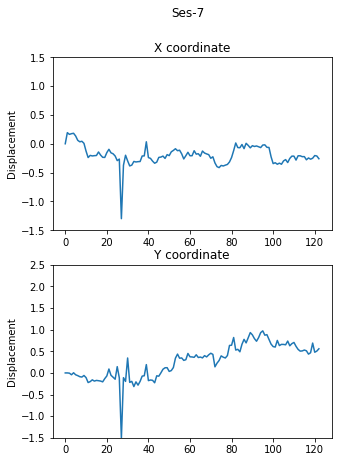

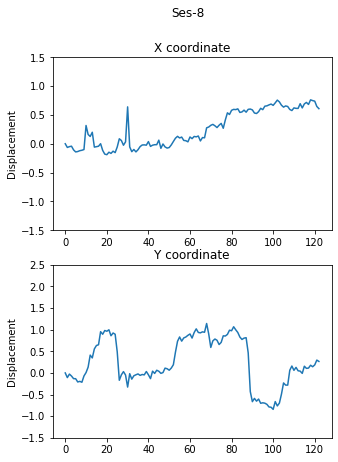

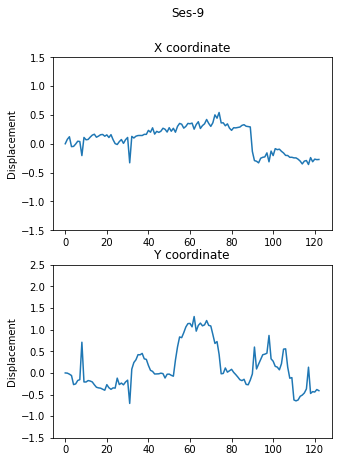

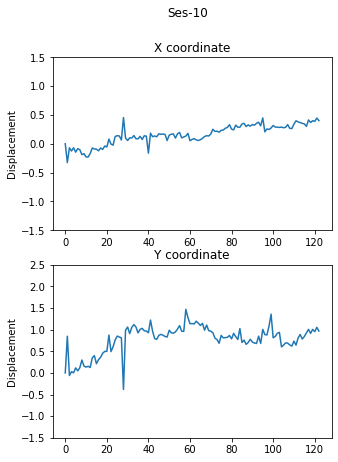

In [7]:
for i, ses in enumerate(list_moco_files_s):
    df = pd.read_csv(list_moco_files_s[i],sep='\t' )
    plot_moco_xy(df,i)

### Following Nawal's scripts

In [8]:
mov_all = [] # contains all the raw motion params all sessions
fd_all = [] # contains the framewise displacement all sessions
mean_fd = np.zeros((len(list_moco_files_s), 2)) # x and y

for i, run in enumerate(list_moco_files_s):
    df = pd.read_csv(run,sep='\t' )
    mat = df.values
    fd = np.diff(mat, axis=0)
    mean_fd[i,:] = np.mean(np.abs(fd),axis=0)
    mov_all.append(mat)
    fd_all.append(fd)

In [9]:
mean_fd

array([[0.04252957, 0.1273454 ],
       [0.0563282 , 0.11539651],
       [0.06442947, 0.08792273],
       [0.10870269, 0.12022725],
       [0.06045515, 0.10519822],
       [0.06531086, 0.11012428],
       [0.06343956, 0.10469498],
       [0.0571175 , 0.10258218],
       [0.06008319, 0.13282669],
       [0.05450469, 0.13324558]])

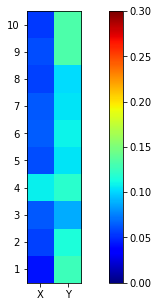

In [10]:
plt.figure(figsize=(10,5))
im = plt.imshow(mean_fd, vmin=0, vmax=0.3, cmap=plt.get_cmap('jet'))
plt.xticks([0,1], ["X","Y"])

plt.yticks(np.linspace(0,9,10), ["1","2","3","4","5","6","7","8","9","10"])
plt.ylim([-0.5,9.5])
plt.colorbar()


### Generate timing files

In [16]:
for i in range(len(list_moco_files_s)):
    full_df = pd.read_excel(os.path.join(local_path, subject, 'timing', 'time.xlsx'), sheet_name='Sheet%s' %str(i+1))
    fr = os.path.join(local_path, subject, 'timing','right_%s.txt' %str(i+1))
    fl = os.path.join(local_path, subject, 'timing','left_%s.txt' %str(i+1))
    
    timebloks_r = (full_df.loc[full_df.Cue =='Right.wav']['CueSound.OnsetTime'].values + 1000 - full_df.loc[full_df.Cue =='Right.wav']['waitForStart.RTTime'].values )/1000
    timebloks_l = (full_df.loc[full_df.Cue =='Left.wav']['CueSound.OnsetTime'].values + 1000 - full_df.loc[full_df.Cue =='Left.wav']['waitForStart.RTTime'].values )/1000
    duration_r = (full_df.loc[full_df.Cue =='Right.wav']['EndSound.OnsetTime'].values - full_df.xloc[full_df.Cue =='Right.wav']['waitForStart.RTTime'].values)/1000 - timebloks_r
    duration_l = (full_df.loc[full_df.Cue =='Left.wav']['EndSound.OnsetTime'].values -  full_df.loc[full_df.Cue =='Left.wav']['waitForStart.RTTime'].values)/1000 - timebloks_l
    
    block_l = np.vstack([timebloks_l, duration_l, np.ones(len(duration_l))]).T
    block_r = np.vstack([timebloks_r, duration_r, np.ones(len(duration_r))]).T
    np.savetxt(fl,block_l,fmt='%.2f')
    np.savetxt(fr,block_r,fmt='%.2f')

In [13]:
import plotly as ply